<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\gabri\AppData\Local\Temp\ipykernel_1756\3755211589.py:10: SyntaxWarning: invalid escape sequence '\d'
  df_2023 = pd.read_fwf('..\database\COTAHIST_A2023.TXT', colspecs=colspecs, names=names, header=None)
C:\Users\gabri\AppData\Local\Temp\ipykernel_1756\3755211589.py:11: SyntaxWarning: invalid escape sequence '\d'
  df_2022 = pd.read_fwf('..\database\COTAHIST_A2022.TXT', colspecs=colspecs, names=names, header=None)
C:\Users\gabri\AppData\Local\Temp\ipykernel_1756\3755211589.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vale2023_df

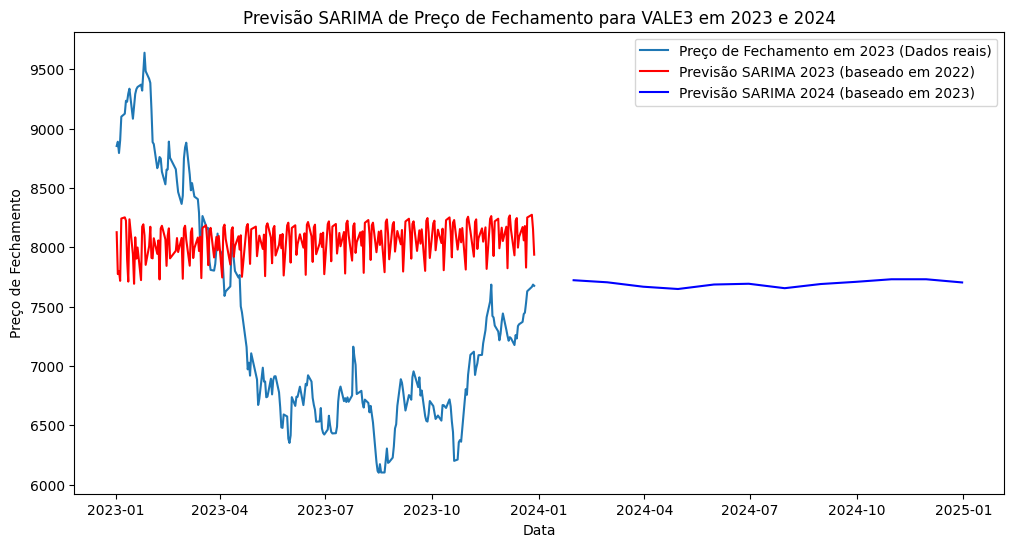

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define os nomes das colunas e as larguras de cada campo
colspecs = [(2, 10), (10, 22), (56, 69), (82, 95)]
names = ['Data', 'Codigo', 'Preco_Abertura', 'Preco_Fechamento']

# Carrega os arquivos
df_2023 = pd.read_fwf('..\database\COTAHIST_A2023.TXT', colspecs=colspecs, names=names, header=None)
df_2022 = pd.read_fwf('..\database\COTAHIST_A2022.TXT', colspecs=colspecs, names=names, header=None)

# Filtra pela ação VALE3, garantindo que seja exatamente VALE3 (sem caracteres adicionais)
vale2023_df = df_2023[df_2023['Codigo'].str.endswith('VALE3')]
vale2022_df = df_2022[df_2022['Codigo'].str.endswith('VALE3')]

# Convertendo a coluna 'Data' para datetime
vale2023_df['Data'] = pd.to_datetime(vale2023_df['Data'], format='%Y%m%d')
vale2022_df['Data'] = pd.to_datetime(vale2022_df['Data'], format='%Y%m%d')

# Selecionando apenas a coluna de preço de fechamento e a data como índice
vale2023_series = vale2023_df.set_index('Data')['Preco_Fechamento']
vale2022_series = vale2022_df.set_index('Data')['Preco_Fechamento']

# Ajuste do modelo SARIMA para 2022
model_2022 = SARIMAX(vale2022_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fit_model_2022 = model_2022.fit()

# Previsão para 2023 com base no modelo SARIMA de 2022
forecast_2023 = fit_model_2022.forecast(steps=len(vale2023_series))

# Ajuste do modelo SARIMA para 2023
model_2023 = SARIMAX(vale2023_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fit_model_2023 = model_2023.fit()

# Previsão para 2024 com base no modelo SARIMA de 2023
forecast_2024 = fit_model_2023.forecast(steps=12)

# Plotagem do gráfico das previsões para 2023 e 2024
plt.figure(figsize=(12, 6))
plt.plot(vale2023_series.index, vale2023_series, label='Preço de Fechamento em 2023 (Dados reais)')
plt.plot(vale2023_series.index, forecast_2023, color='red', label='Previsão SARIMA 2023 (baseado em 2022)')
plt.plot(pd.date_range(start='2024-01-01', periods=12, freq='M'), forecast_2024, color='blue', label='Previsão SARIMA 2024 (baseado em 2023)')
plt.title('Previsão SARIMA de Preço de Fechamento para VALE3 em 2023 e 2024')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()